In [2]:
# Import core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Import sklearn modules
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

# Import ML algorithms
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Suppress warnings
warnings.filterwarnings('ignore')

<div class="warning" style='background-color:#FFD580; color: #B5651D; border: solid #FF8C00 4px; border-radius: 4px; padding:0.7em; width:90%'>

    
Start anew here, nothing else seems to be working, so let's give it a shot

</div>


In [4]:
#read in the dataset
spotify = pd.read_csv(r'C:/Users/furun/Downloads/archive_spotify/dataset.csv')
spotify.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
#subset the data, pick 10k records, then pick the columns you want
subset = spotify.sample(10000)

X = subset[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = subset['track_genre']

In [50]:
#Encode if neccessary, totally sure I'm gonna have to one hot encoder X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


10000

In [8]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#test model 
model = DecisionTreeClassifier(max_depth = 10, random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.186


In [11]:
#So that was horrible, lets check the dtypes
X.dtypes

popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [12]:
#Since that performed so poorly, let's try to look at feature importance
import matplotlib.pyplot as plt

#Since the model is already trained, let's pull out our feature names
feature_names = X.columns
feature_importance = model.feature_importances_

#create a Dataframe for better viz
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by = 'Importance', ascending = False)

print(importance_df)

             Feature  Importance
0         popularity    0.247297
9       acousticness    0.143633
1        duration_ms    0.099258
12           valence    0.088313
3       danceability    0.085856
6           loudness    0.079631
8        speechiness    0.061465
13             tempo    0.055281
4             energy    0.052127
10  instrumentalness    0.039464
11          liveness    0.026151
7               mode    0.012653
5                key    0.004118
2           explicit    0.004008
14    time_signature    0.000745


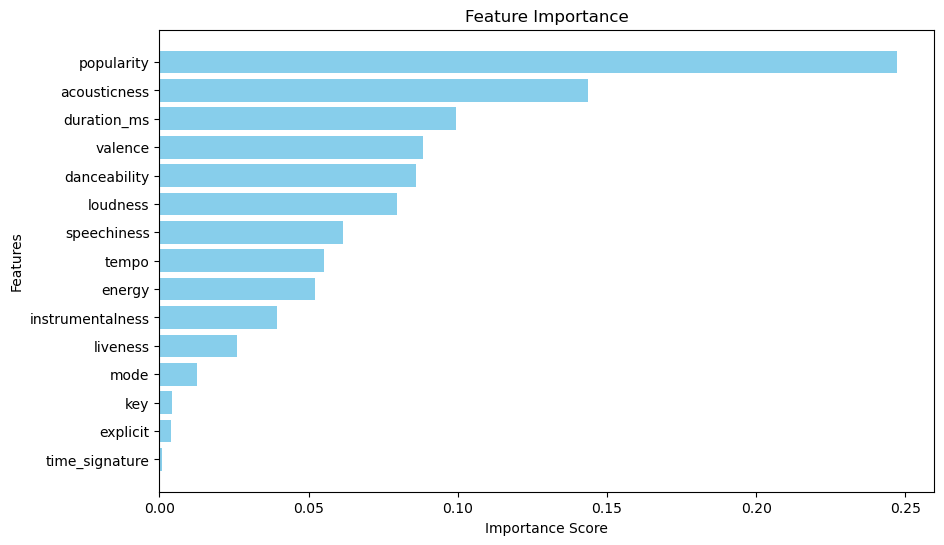

In [13]:
#Plot it 
# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature on top
plt.show()

In [14]:
#Given the above, let's try to tweak
#subset the data, pick 10k records, then pick the columns you want (top 7) the rerun the model
subset = spotify.sample(10000)

X = subset[['popularity', 'duration_ms', 'danceability', 'speechiness', 'acousticness',
            'instrumentalness',  'valence']]
y = subset['track_genre']

In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#test model 
model = DecisionTreeClassifier(max_depth = 10, random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [18]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.178


In [19]:
#Let's maybe think of the next step, let's try randomforest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train) 
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")


Random Forest Accuracy: 0.2415


In [20]:
#Ok, given the .246 accuracy of a random forest, let's move on and try logstic regression 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter = 1000, random_state= 42)
lr_model.fit(X_train, y_train)

#evaluate
y_pred = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")

Logistic Regression Accuracy: 0.0385


In [21]:
#Oh no, that was a step backwards, let's try using gradient boosting
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 100, random_state = 42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred)}")


XGBoost Accuracy: 0.23


In [22]:
#ok, so those didn't peform well, let's try to create a composite feature
#Given the above, let's try to tweak
#subset the data, pick 10k records, then pick the columns you want (top 7) the rerun the model
subset = spotify.sample(10000)
subset['danceability_valence'] = subset['danceability'] + subset['valence']
X = subset[['popularity', 'duration_ms',  'speechiness', 'acousticness',
            'instrumentalness',  'danceability_valence']]
y = subset['track_genre']

In [23]:
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#test model 
model = DecisionTreeClassifier(max_depth = 10, random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.1775


In [27]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train) 
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")

Random Forest Accuracy: 0.216


In [28]:
# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.2145


In [29]:
#So the features got worse, let's try some other combinations
subset = spotify.sample(10000)
subset_list = ['popularity', 'duration_ms', 'danceability', 'speechiness', 'acousticness',
             'valence']
subset_1 = 'loudness'
subset_2 = 'instrumentalness'
y_val = 'track_genre'
def composite_features(subset, subset_1, subset_2, subset_list, y_val):
    subset[subset_1 + "_" + subset_2] = subset[subset_1] + subset[subset_2]
    subset_list.append(subset_1 + "_" + subset_2)
    X = subset[subset_list]
    y = subset[y_val]
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(max_depth = 10, random_state= 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy: {accuracy}")
    return accuracy
composite_features(subset, subset_1, subset_2, subset_list, y_val)

0.172

In [30]:
#That did not work, let's go ahead and try all the combinations!

from itertools import combinations

# Define the list of features you want to test
feature_list = ['danceability', 'valence', 'energy', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'popularity', 'duration_ms', 'loudness', 'tempo']

# Generate all unique pairs of features
feature_pairs = list(combinations(feature_list, 2))

# Subset columns to include in the model
subset_list = ['popularity', 'acousticness', 'duration_ms']  # Example initial features

# Target column
y_val = 'track_genre'

results = {}
# Loop through each pair and apply the function
for pair in feature_pairs:
    subset_1, subset_2 = pair
    results[subset_1 + " " + subset_2] = composite_features(subset, subset_1, subset_2, subset_list, y_val)


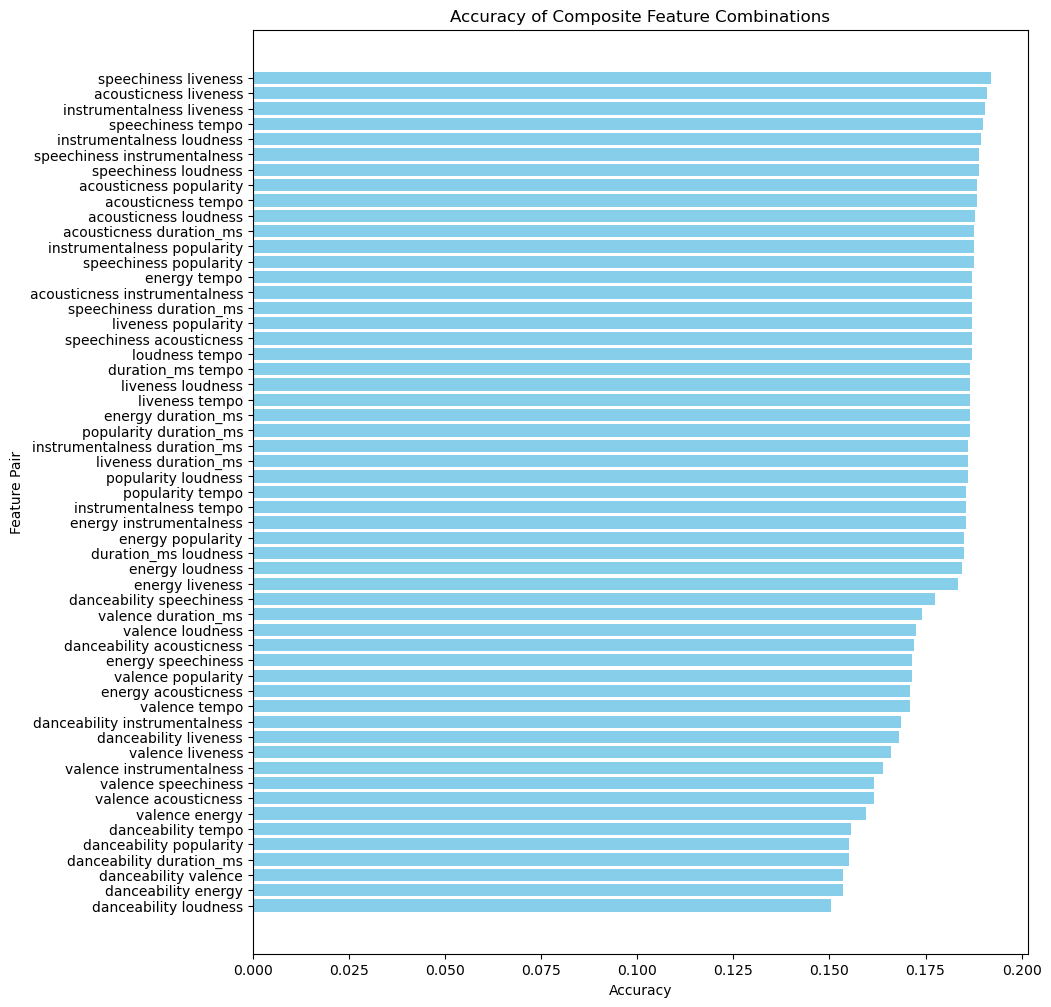

In [31]:
# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results.items(), columns=['Feature Pair', 'Accuracy'])

# Sort by accuracy for better visualization
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plot the results
plt.figure(figsize=(10, 12))  # Adjust the figure size for readability
plt.barh(results_df['Feature Pair'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Feature Pair')
plt.title('Accuracy of Composite Feature Combinations')
plt.gca().invert_yaxis()  # Place the highest accuracy at the top
plt.show()

In [32]:
#uh, just try a nueral network

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply scaling to your feature set


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(len(set(y)), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_scaled, y, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {test_accuracy}")


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0429 - loss: 4.5824 - val_accuracy: 0.1060 - val_loss: 3.9714
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1262 - loss: 3.8076 - val_accuracy: 0.1350 - val_loss: 3.7546
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1559 - loss: 3.6038 - val_accuracy: 0.1325 - val_loss: 3.6569
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1601 - loss: 3.4986 - val_accuracy: 0.1500 - val_loss: 3.5989
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1741 - loss: 3.4361 - val_accuracy: 0.1590 - val_loss: 3.5436
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1841 - loss: 3.3948 - val_accuracy: 0.1690 - val_loss: 3.5138
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1887 - loss: 3.3438 - val_accuracy: 0.1695 - val_loss: 3.4901
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1936 - loss: 3.3158 - val_accuracy: 0.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # Output layer
])


In [40]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, y_train, class_weight=class_weight_dict, validation_split=0.2, epochs=20)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0114 - loss: 7934.2451 - val_accuracy: 0.0081 - val_loss: 4.7369
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0102 - loss: 4.7366 - val_accuracy: 0.0081 - val_loss: 4.7376
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0113 - loss: 4.7422 - val_accuracy: 0.0081 - val_loss: 4.7384
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0071 - loss: 4.7387 - val_accuracy: 0.0081 - val_loss: 4.7391
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0096 - loss: 4.7445 - val_accuracy: 0.0081 - val_loss: 4.7399
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0109 - loss: 4.7471 - val_accuracy: 0.0081 - val_loss: 4.7407
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0098 - loss: 4.7374 - val_accuracy: 0.0081 - val_loss: 4.7413
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0073 - loss: 4.7364 - val_accuracy:

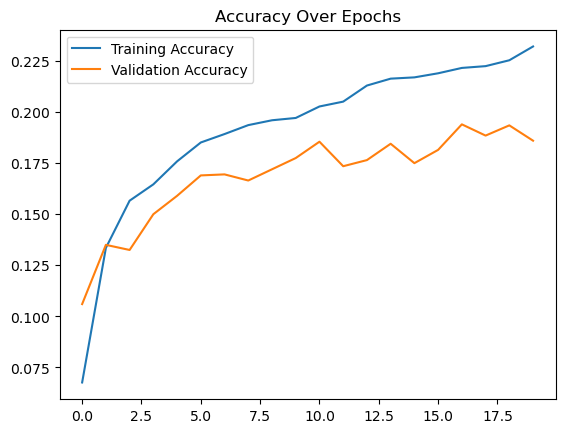

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


In [42]:
from tensorflow.keras.optimizers import AdamW
model.compile(optimizer=AdamW(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=1e-2, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
model.fit(X_train, y_train, 
          class_weight=class_weight_dict, 
          validation_split=0.2, 
          epochs=20,
          callbacks=[lr_scheduler])
from tensorflow.keras.optimizers import Adagrad
model.compile(optimizer=Adagrad(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0097 - loss: 4.7361 - val_accuracy: 0.0081 - val_loss: 4.7487 - learning_rate: 0.0100
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0093 - loss: 4.7437 - val_accuracy: 0.0081 - val_loss: 4.7489 - learning_rate: 0.0100
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0072 - loss: 4.7418 - val_accuracy: 0.0081 - val_loss: 4.7493 - learning_rate: 0.0100
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0088 - loss: 4.7160 - val_accuracy: 0.0081 - val_loss: 4.7495 - learning_rate: 0.0100
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0083 - loss: 4.7379 - val_accuracy: 0.0081 - val_loss: 4.7498 - learning_rate: 0.0050
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0090 - loss: 4.7342 - val_accuracy: 0.0081 - val_loss: 4.7500 - learning_rate: 0.0050
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0076 - loss: 4.7401 - 

In [44]:
from tensorflow.keras.optimizers import AdamW, RMSprop, SGD, Adagrad
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the list of optimizers with their configurations
optimizers = [
    ('AdamW', AdamW(learning_rate=1e-3)),
    ('RMSprop', RMSprop(learning_rate=1e-3)),
    ('SGD', SGD(learning_rate=1e-2, momentum=0.9)),
    ('Adagrad', Adagrad(learning_rate=1e-2))
]

# Initialize learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Loop through each optimizer
results = {}
for name, optimizer in optimizers:
    print(f"Training with {name} optimizer...")
    
    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train,
                        class_weight=class_weight_dict,
                        validation_split=0.2,
                        epochs=20,
                        callbacks=[lr_scheduler])
    
    # Save results for each optimizer
    results[name] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }
    print(f"Finished training with {name} optimizer!\n")

# Print summary of results
for name, metrics in results.items():
    print(f"Results for {name}:")
    print(f"  Final Training Accuracy: {metrics['accuracy'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {metrics['val_accuracy'][-1]:.4f}")
    print(f"  Final Training Loss: {metrics['loss'][-1]:.4f}")
    print(f"  Final Validation Loss: {metrics['val_loss'][-1]:.4f}\n")


Training with AdamW optimizer...
Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0072 - loss: 4.7412 - val_accuracy: 0.0063 - val_loss: 4.7505 - learning_rate: 0.0010
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0086 - loss: 4.7394 - val_accuracy: 0.0081 - val_loss: 4.7505 - learning_rate: 0.0010
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0113 - loss: 4.7369 - val_accuracy: 0.0063 - val_loss: 4.7507 - learning_rate: 0.0010
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0073 - loss: 4.7447 - val_accuracy: 0.0081 - val_loss: 4.7506 - learning_rate: 0.0010
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0097 - loss: 4.7347 - val_accuracy: 0.0063 - val_loss: 4.7507 - learning_rate: 5.0000e-04
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0085 - loss: 4.7363 - val_accuracy: 0.0081 - val_loss: 4.7507 - learning_rate: 5.0000e-04
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/